<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a series of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [3]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [5]:
# Answer:
#979 rows overall, but content_rating only says 976. This will come up again later.
movies.count()

star_rating       979
title             979
content_rating    976
genre             979
duration          979
actors_list       979
dtype: int64

#### Check the data type of each column.

In [6]:
# Answer:
# One float, four objects, and an integer

movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


#### Calculate the average movie duration.

In [10]:
# Answer:
#The mean movie duration is 120.98 minutes, or about 2 hours and 1 minute.
movies.describe()

,star_rating,duration
count,979.000000,979.000000
mean,7.889785,120.979571
std,0.336069,26.218010
min,7.400000,64.000000
25%,7.600000,102.000000
50%,7.800000,117.000000
75%,8.100000,134.000000
max,9.300000,242.000000


#### Sort the DataFrame by duration to find the shortest and longest movies.

In [11]:
# Answer:
# The shortest movie on the list is 'Freaks', the longest is Kenneth Branagh's version of 'Hamlet'
movies.sort_values(by = ['duration'])

,star_rating,title,content_rating,genre,duration,actors_list
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla..."
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G..."
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric..."
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']"
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack..."
...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

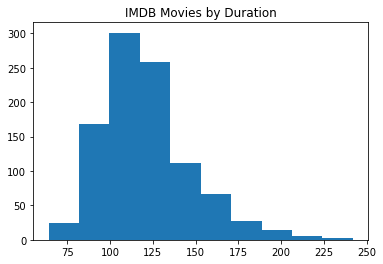

In [14]:
# Answer:
plt.hist(movies['duration'], bins = 10)
plt.title('IMDB Movies by Duration');

#### Use a box plot to display that same data.

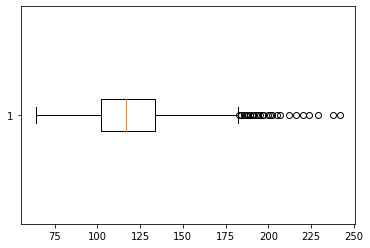

In [20]:
# Answer:
plt.boxplot(movies['duration'], vert = False);

## Intermediate level

#### Count how many movies have each of the content ratings.

In [39]:
# Answer:
movies.value_counts('content_rating')

content_rating
R            460
PG-13        189
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
NC-17          7
PASSED         7
X              4
GP             3
TV-MA          1
dtype: int64

#### Use a visualization to display that same data, including a title and x and y labels.

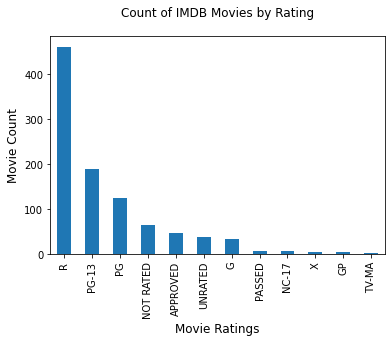

In [51]:
# Answer:

movies['content_rating'].value_counts(sort=True).plot.bar()
plt.title('Count of IMDB Movies by Rating', pad = 20)
plt.ylabel('Movie Count', fontsize = 12)
plt.xlabel('Movie Ratings', fontsize = 12);

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [132]:
# Answer:
#I'm not sure why I can't get this or the 'NC-17' one to work properly.

movies['content_rating'].replace(to_replace = 'NOT RATED', value = 'UNRATED'),
movies["content_rating"].replace(to_replace = "APPROVED", value = "UNRATED"),
movies["content_rating"].replace(to_replace = "PASSED", value = "UNRATED"),
movies["content_rating"].replace(to_replace = "GP", value = "UNRATED")

movies.sort_values(by = ['duration'])

,star_rating,title,content_rating,genre,duration,actors_list,Movie Length
389,8.0,Freaks,UNRATED,Drama,64,"[u'Wallace Ford', u'Leila Hyams', u'Olga Bacla...",Under 2 Hours
338,8.0,Battleship Potemkin,UNRATED,History,66,"[u'Aleksandr Antonov', u'Vladimir Barsky', u'G...",Under 2 Hours
258,8.1,The Cabinet of Dr. Caligari,UNRATED,Crime,67,"[u'Werner Krauss', u'Conrad Veidt', u'Friedric...",Under 2 Hours
293,8.1,Duck Soup,PASSED,Comedy,68,"[u'Groucho Marx', u'Harpo Marx', u'Chico Marx']",Under 2 Hours
88,8.4,The Kid,NOT RATED,Comedy,68,"[u'Charles Chaplin', u'Edna Purviance', u'Jack...",Under 2 Hours
...,...,...,...,...,...,...,...
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba...",Over 2 Hours
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell...",Over 2 Hours
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet...",Over 2 Hours
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit...",Over 2 Hours


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [134]:
# Answer:

movies['content_rating'].replace(to_replace = 'X', value = 'NC-17')
movies['content_rating'].replace(to_replace = 'TV-MA', value = 'NC-17')

movies.content_rating.value_counts()

R            460
PG-13        192
PG           123
NOT RATED     65
APPROVED      47
UNRATED       38
G             32
PASSED         7
NC-17          7
X              4
GP             3
TV-MA          1
Name: content_rating, dtype: int64

#### Count the number of missing values in each column.

In [66]:
# Answer:
#Told you those three missing rows from content_rating would come up again...

movies.isna().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [69]:
# Answer:
movies.loc[movies['content_rating'].isnull()]
movies["content_rating"].fillna("PG-13", inplace = True)

#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [72]:
# Answer:

# Grouping the movies based on those over/under 120 minutes
movies.loc[movies.duration < 120, 'Movie Length'] = 'Under 2 Hours'
movies.loc[movies.duration >= 120, 'Movie Length'] = 'Over 2 Hours'
 
# Finding the mean for those two new groups
movies.groupby('Movie Length').mean()

,star_rating,duration
Movie Length,,
Over 2 Hours,7.948899,142.458150
Under 2 Hours,7.838667,102.405714


#### Use a visualization to detect whether there is a relationship between duration and star rating.

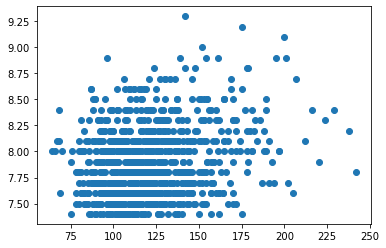

In [75]:
# Answer:
#Slight positive relationship, but overall, no.

plt.scatter(movies['duration'], movies['star_rating'])

#### Calculate the average duration for each genre.

In [80]:
# Answer:
#Westerns were the lonest at 2h16m and History was the shortest genre at 1h6m

movies.groupby('genre').mean().sort_values(['duration'],ascending=False)

,star_rating,duration
genre,,
Western,8.255556,136.666667
Adventure,7.933333,134.840000
Biography,7.862338,131.844156
Drama,7.902518,126.539568
Action,7.884559,126.485294
Crime,7.916935,122.298387
Mystery,7.975000,115.625000
Thriller,7.680000,114.200000
Fantasy,7.700000,112.000000


## Advanced level

#### Visualize the relationship between content rating and duration.

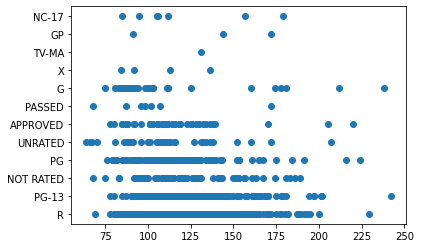

In [83]:
# Answer:
plt.scatter(movies['duration'], movies['content_rating'])

#### Determine the top rated movie (by star rating) for each genre.

In [84]:
# Answer:
movies.groupby('genre').head(1).sort_values(['star_rating'],ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list,Movie Length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Over 2 Hours
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",Over 2 Hours
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals...",Under 2 Hours
6,8.9,"The Good, the Bad and the Ugly",NOT RATED,Western,161,"[u'Clint Eastwood', u'Eli Wallach', u'Lee Van ...",Over 2 Hours
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK...",Over 2 Hours
8,8.9,Schindler's List,R,Biography,195,"[u'Liam Neeson', u'Ralph Fiennes', u'Ben Kings...",Over 2 Hours
25,8.6,Life Is Beautiful,PG-13,Comedy,116,"[u'Roberto Benigni', u'Nicoletta Braschi', u'G...",Under 2 Hours
30,8.6,Spirited Away,PG,Animation,125,"[u'Daveigh Chase', u'Suzanne Pleshette', u'Miy...",Over 2 Hours
38,8.6,Rear Window,APPROVED,Mystery,112,"[u'James Stewart', u'Grace Kelly', u'Wendell C...",Under 2 Hours
39,8.6,Psycho,R,Horror,109,"[u'Anthony Perkins', u'Janet Leigh', u'Vera Mi...",Under 2 Hours


#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [105]:
# Answer:
duplicate_titles = movies[movies.duplicated('title')]

duplicate_titles

#Not sure why only one of each is showing, but as a movie fan I know that there are corresponding originals/remakes to each of these four titles

,star_rating,title,content_rating,genre,duration,actors_list,Movie Length
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr...",Over 2 Hours
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho...",Over 2 Hours
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm...",Over 2 Hours
936,7.4,True Grit,PG-13,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']",Over 2 Hours


#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [122]:
# Answer:

#Create a new version of 'movies' that is limited to genres where ten or more are present
genre_10 = movies[movies.groupby("genre")['genre'].transform('size') >= 10]
genre_10

,star_rating,title,content_rating,genre,duration,actors_list,Movie Length
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt...",Over 2 Hours
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']",Over 2 Hours
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv...",Over 2 Hours
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E...",Over 2 Hours
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L....",Over 2 Hours
...,...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G...",Under 2 Hours
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma...",Under 2 Hours
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo...",Over 2 Hours
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr...",Under 2 Hours


In [113]:
#Doublecheck the count by seeing how many of each genre are in 'movies'
#979 original rows in 'movies' minus 26 from the smaller genres gives us 953 rows, which 'genre_10' does.

movies.groupby('genre').size().sort_values(ascending = False)

genre
Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Sci-Fi         5
Thriller       5
Film-Noir      3
Family         2
Fantasy        1
History        1
dtype: int64

In [121]:
#Reuse the groupby() and mean() code from earlier on the new 'genre_10' dataset

genre_10.groupby('genre').mean().sort_values(by = 'star_rating', ascending = False)

,star_rating,duration
genre,,
Mystery,7.975000,115.625000
Adventure,7.933333,134.840000
Crime,7.916935,122.298387
Animation,7.914516,96.596774
Drama,7.902518,126.539568
Action,7.884559,126.485294
Biography,7.862338,131.844156
Comedy,7.822436,107.602564
Horror,7.806897,102.517241


#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [ ]:
# Answer:

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [123]:
# Answer:

#### Option 4: aggregate by count and mean, then filter using the count

In [ ]:
# Answer:

## Bonus

#### Figure out something "interesting" using the actors data!

In [137]:
#Meryl Streep was in seven of the movies on this list
movies[movies['actors_list'].str.contains('Meryl Streep', na = False)]

,star_rating,title,content_rating,genre,duration,actors_list,Movie Length
512,7.8,Fantastic Mr. Fox,PG,Animation,87,"[u'George Clooney', u'Meryl Streep', u'Bill Mu...",Under 2 Hours
575,7.8,Kramer vs. Kramer,APPROVED,Drama,105,"[u'Dustin Hoffman', u'Meryl Streep', u'Jane Al...",Under 2 Hours
602,7.7,Adaptation.,R,Comedy,114,"[u'Nicolas Cage', u'Meryl Streep', u'Chris Coo...",Under 2 Hours
659,7.7,Sophie's Choice,R,Drama,150,"[u'Meryl Streep', u'Kevin Kline', u'Peter MacN...",Over 2 Hours
810,7.6,The Hours,PG-13,Drama,114,"[u'Meryl Streep', u'Nicole Kidman', u'Julianne...",Under 2 Hours
851,7.5,The Bridges of Madison County,PG-13,Drama,135,"[u'Clint Eastwood', u'Meryl Streep', u'Annie C...",Over 2 Hours
859,7.5,Doubt,PG-13,Drama,104,"[u'Meryl Streep', u'Philip Seymour Hoffman', u...",Under 2 Hours
